In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Задание 1
```Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.```

In [142]:
dataset = load_boston()

In [143]:
feature_names = dataset['feature_names']
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [144]:
X = pd.DataFrame(dataset['data'], columns=feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [145]:
y = pd.DataFrame(dataset['target'], columns=['price'])
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [147]:
scaler = StandardScaler()

In [148]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

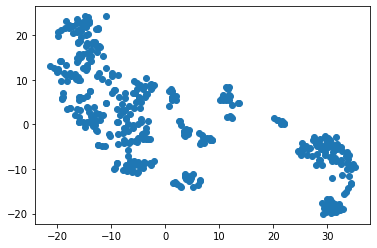

In [149]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]);

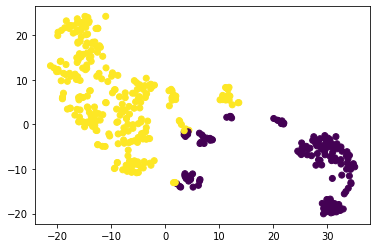

In [150]:
kmeans = KMeans(n_clusters=2)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

# Задание 2
```С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.```

In [151]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [152]:
train_labels = kmeans.fit_predict(X_train_scaled)

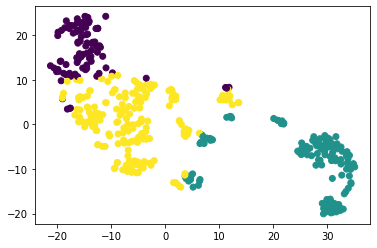

In [153]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels);

In [154]:
labels_test = kmeans.predict(X_test_scaled)

In [155]:
print(y_train[train_labels == 0].mean())
print(y_train[train_labels == 1].mean()) 
print(y_train[train_labels == 2].mean())

price    27.788372
dtype: float64
price    16.165354
dtype: float64
price    24.958115
dtype: float64


In [156]:
print(X_train['CRIM'][train_labels == 0].mean())
print(X_train['CRIM'][train_labels == 1].mean())
print(X_train['CRIM'][train_labels == 2].mean())

0.07356558139534886
10.797028425196853
0.42166020942408367


# * Задание 3
```Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.```

In [157]:
print(y_test[labels_test == 0].mean())
print(y_test[labels_test == 1].mean()) 
print(y_test[labels_test == 2].mean())

price    31.35
dtype: float64
price    16.437143
dtype: float64
price    21.860784
dtype: float64


In [158]:
print(X_test['CRIM'][labels_test == 0].mean())
print(X_test['CRIM'][labels_test == 1].mean())
print(X_test['CRIM'][labels_test == 2].mean())

0.062060000000000004
10.165531142857143
0.26607882352941176
